## The factors that affect the weight of the baby at birth through out the pregnancy


### 1. Features
* Case - ID
* btw - Birthweight, in ounces
* gestation - Length of gestation, in days
* parity - Binary indicator for a first pregnancy (0 = first pregnancy)
* age - Mother's age in years
* height - Mother's height in inches
* weight - Mother's weight in pounds
* smoke - Binary indicator for whether the mother smokes

### 2. The data
https://www.kaggle.com/datasets/jacopoferretti/child-weight-at-birth-and-gestation-details/data

### 3. Steps

* Import the tools
* Import the data
* Fill the missing values
* Split the data into x and y
* Train and test split
* Ridge Regression is sensitive to feature scales, so standardization is important
* Fit the ridge regression
* Evaluate the model
* Hyperparameter Tuning (alpha in Ridge)
* Cross Validation
* Save model

## Preparing the tools

In [3]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Models from Scikit-Learn
from sklearn.linear_model import Ridge

In [8]:
babies = pd.read_csv("babies.csv")
babies[:10]

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
5,6,136,286.0,0,25.0,62.0,93.0,0.0
6,7,138,244.0,0,33.0,62.0,178.0,0.0
7,8,132,245.0,0,23.0,65.0,140.0,0.0
8,9,120,289.0,0,25.0,62.0,125.0,0.0
9,10,143,299.0,0,30.0,66.0,136.0,1.0


In [5]:
babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [7]:
babies.isna().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [10]:
babies.fillna(babies.mean(numeric_only=True), inplace=True)
babies.isna().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X = babies.drop('btw', axis=1)  # Features
y = babies['bwt']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # You can tune alpha later
ridge.fit(X_train_scaled, y_train)

Ridge()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = ridge.predict(X_test_scaled)

print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R^2 Score: 0.28781665352905794


TypeError: got an unexpected keyword argument 'squared'

In [16]:
from sklearn.metrics import mean_squared_error

# Compute RMSE manually
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)

R^2 Score: 0.28781665352905794
RMSE: 16.758708980272566


In [17]:
# alpha controls the regularization strength. We can tune it using GridSearchCV.
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Range of alpha values to try
alphas = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Ridge with cross-validation
ridge_cv = GridSearchCV(Ridge(), param_grid=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Best model and alpha
print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best CV score:", ridge_cv.best_score_)

Best alpha: 100
Best CV score: 0.21694116009387834


In [18]:
# Cross-validation helps evaluate generalizability
from sklearn.model_selection import cross_val_score

# Mean R^2 across folds
cv_scores = cross_val_score(Ridge(alpha=ridge_cv.best_params_['alpha']),
                            X_train_scaled, y_train, cv=5, scoring='r2')

print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2:", cv_scores.mean())

Cross-validated R^2 scores: [0.21580491 0.14425603 0.22350503 0.23631145 0.26482838]
Mean R^2: 0.21694116009387834


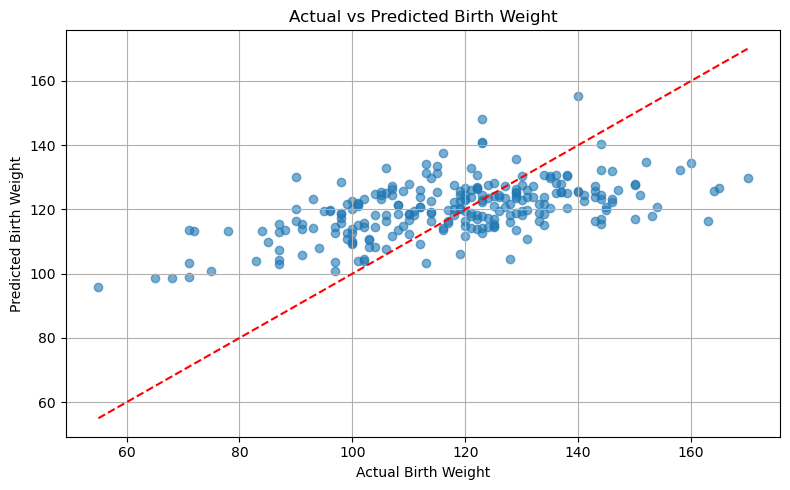

In [19]:
# Plot prediction vs Actual
import matplotlib.pyplot as plt

y_pred = ridge_cv.predict(X_test_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Birth Weight")
plt.ylabel("Predicted Birth Weight")
plt.title("Actual vs Predicted Birth Weight")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
import joblib

# Save the model to a file
joblib.dump(best_ridge, 'ridge_best_model.pkl')

# Optional: Save the scaler too
joblib.dump(scaler, 'scaler.pkl')

NameError: name 'best_ridge' is not defined

In [24]:
best_ridge = ridge_cv.best_estimator_

In [25]:
y_pred = best_ridge.predict(X_test_scaled)

In [23]:
ridge_cv.best_estimator_

Ridge(alpha=100)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2 Score:", r2)
print("RMSE:", rmse)

R^2 Score: 0.2790795442642515
RMSE: 16.861194053365015


In [27]:
import joblib

# Save the model to a file
joblib.dump(best_ridge, 'ridge_best_model.pkl')

# Optional: Save the scaler too
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [28]:
best_ridge = joblib.load('ridge_best_model.pkl')
scaler = joblib.load('scaler.pkl')

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Birth Weight")
plt.ylabel("Predicted Birth Weight")
plt.title("Actual vs Predicted Birth Weight")
plt.grid(True)
plt.tight_layout()
plt.savefig("actual_vs_predicted.png")
plt.close()